<h1>Chris Models</h1>

In [24]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [25]:
#p1 dataset
p1 = pd.read_csv('plant1.csv')

In [26]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            68774 non-null  object 
 1   source_key_x         68774 non-null  object 
 2   dc_power             68774 non-null  float64
 3   ac_power             68774 non-null  float64
 4   daily_yield          68774 non-null  float64
 5   total_yield          68774 non-null  float64
 6   ambient_temperature  68774 non-null  float64
 7   module_temperature   68774 non-null  float64
 8   irradiation          68774 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.7+ MB


In [27]:
#inverter encoding
df_encoded = pd.get_dummies(p1, columns=['source_key_x'])
df_encoded

,date_time,dc_power,ac_power,daily_yield,total_yield,ambient_temperature,module_temperature,irradiation,source_key_x_1BY6WEcLGh8j5v7,source_key_x_1IF53ai7Xc0U56Y,...,source_key_x_iCRJl6heRkivqQ3,source_key_x_ih0vzX44oOqAx2f,source_key_x_pkci93gMrogZuBj,source_key_x_rGa61gmuvPhdLxV,source_key_x_sjndEbLyjtCKgGv,source_key_x_uHbuxQJl8lW7ozc,source_key_x_wCURE6d3bPkepu2,source_key_x_z9Y9gH1T5YWrNuG,source_key_x_zBIq5rxdHJRwDNY,source_key_x_zVJPv84UY57bAof
0,2020-05-15 00:00:00,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-05-15 00:00:00,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-05-15 00:00:00,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-05-15 00:00:00,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-05-15 00:00:00,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
68770,2020-06-17 23:45:00,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
68771,2020-06-17 23:45:00,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
68772,2020-06-17 23:45:00,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df_encoded['date_time'] = pd.to_datetime(df_encoded['date_time'],format='%Y-%m-%d %H:%M')

In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date_time                     68774 non-null  datetime64[ns]
 1   dc_power                      68774 non-null  float64       
 2   ac_power                      68774 non-null  float64       
 3   daily_yield                   68774 non-null  float64       
 4   total_yield                   68774 non-null  float64       
 5   ambient_temperature           68774 non-null  float64       
 6   module_temperature            68774 non-null  float64       
 7   irradiation                   68774 non-null  float64       
 8   source_key_x_1BY6WEcLGh8j5v7  68774 non-null  uint8         
 9   source_key_x_1IF53ai7Xc0U56Y  68774 non-null  uint8         
 10  source_key_x_3PZuoBAID5Wc2HD  68774 non-null  uint8         
 11  source_key_x_7JYdWkrLSPkdwr4

In [30]:
df_encoded['date_time'] = df_encoded['date_time'].apply(lambda x: x.timestamp())
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date_time                     68774 non-null  float64
 1   dc_power                      68774 non-null  float64
 2   ac_power                      68774 non-null  float64
 3   daily_yield                   68774 non-null  float64
 4   total_yield                   68774 non-null  float64
 5   ambient_temperature           68774 non-null  float64
 6   module_temperature            68774 non-null  float64
 7   irradiation                   68774 non-null  float64
 8   source_key_x_1BY6WEcLGh8j5v7  68774 non-null  uint8  
 9   source_key_x_1IF53ai7Xc0U56Y  68774 non-null  uint8  
 10  source_key_x_3PZuoBAID5Wc2HD  68774 non-null  uint8  
 11  source_key_x_7JYdWkrLSPkdwr4  68774 non-null  uint8  
 12  source_key_x_McdE0feGgRqW7Ca  68774 non-null  uint8  
 13  s

<h1>Can we predict the power generation for next couple of days? - this allows for better grid management</h1>

<h2>Cross Validation </h2>


In [31]:
#setting the varibles
X = df_encoded.drop(['daily_yield'], axis=1)
y = df_encoded['daily_yield']

In [32]:
#splitting the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#cross validation method 1
x_tr, x_val, y_tr, y_val =  train_test_split(X_train ,y_train, test_size=0.1)

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_encoded.drop(['daily_yield'], axis=1)
y = df_encoded['daily_yield']


model = LinearRegression()

# 1. Holdout Validation
def holdout_validation(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# 2. K-Fold Cross-Validation
def k_fold_cross_validation(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf)
    return np.mean(scores), np.std(scores)

# 3. Leave-One-Out Cross-Validation
def loocv_cross_validation(X, y):
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo)
    return np.mean(scores), np.std(scores)

# Esegui i metodi e stampa i risultati
holdout_acc = holdout_validation(X, y)
kfold_mean_acc, kfold_std_acc = k_fold_cross_validation(X, y)
loocv_mean_acc, loocv_std_acc = loocv_cross_validation(X, y)

print(f"Holdout Validation Accuracy: {holdout_acc:.4f}")
print(f"K-Fold Cross-Validation Accuracy: {kfold_mean_acc:.4f} ± {kfold_std_acc:.4f}")
print(f"LOOCV Cross-Validation Accuracy: {loocv_mean_acc:.4f} ± {loocv_std_acc:.4f}")


ValueError: continuous is not supported

In [37]:
from sklearn.metrics import mean_squared_error, make_scorer
# 1. Holdout Validation
def holdout_validation(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# 2. K-Fold Cross-Validation
def k_fold_cross_validation(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
    return np.mean(-scores), np.std(-scores)

holdout_mse = holdout_validation(X, y)
kfold_mean_mse, kfold_std_mse = k_fold_cross_validation(X, y)
print(f"Holdout Validation MSE: {holdout_mse:.4f}")
print(f"K-Fold Cross-Validation MSE: {kfold_mean_mse:.4f} ± {kfold_std_mse:.4f}")

Holdout Validation MSE: 5418855.6767
K-Fold Cross-Validation MSE: 5271255.3759 ± 79147.0391


In [38]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Supponendo che il tuo dataframe df_encoded sia già caricato
X = df_encoded.drop(['daily_yield'], axis=1)
y = df_encoded['daily_yield']


model = LinearRegression()

# 1. Holdout Validation
def holdout_validation(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# 2. K-Fold Cross-Validation
def k_fold_cross_validation(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)
    
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)
    
    return np.mean(-mse_scores), np.std(-mse_scores), np.mean(r2_scores), np.std(r2_scores)

# Esegui i metodi e stampa i risultati
holdout_mse, holdout_r2 = holdout_validation(X, y)
kfold_mean_mse, kfold_std_mse, kfold_mean_r2, kfold_std_r2 = k_fold_cross_validation(X, y)


print(f"Holdout Validation MSE: {holdout_mse:.4f}, R2: {holdout_r2:.4f}")
print(f"K-Fold Cross-Validation MSE: {kfold_mean_mse:.4f} ± {kfold_std_mse:.4f}, R2: {kfold_mean_r2:.4f} ± {kfold_std_r2:.4f}")


Holdout Validation MSE: 5418855.6767, R2: 0.4601
K-Fold Cross-Validation MSE: 5271255.3759 ± 79147.0391, R2: 0.4754 ± 0.0079


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Supponendo che il tuo dataframe df_encoded sia già caricato
# X = df_encoded.drop(['daily_yield'], axis=1)
# y = df_encoded['daily_yield']

# Esempio di dati sintetici (rimpiazza con il tuo dataframe)
model = LinearRegression()

# 1. Holdout Validation
def holdout_validation(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# 2. K-Fold Cross-Validation
def k_fold_cross_validation(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)
    
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)
    
    return np.mean(-mse_scores), np.std(-mse_scores), np.mean(r2_scores), np.std(r2_scores)

# 3. Predizione di tutti 0
def predict_all_zeros(X, y):
    y_pred = np.zeros_like(y)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

# Esegui i metodi e stampa i risultati
holdout_mse, holdout_r2 = holdout_validation(X, y)
kfold_mean_mse, kfold_std_mse, kfold_mean_r2, kfold_std_r2 = k_fold_cross_validation(X, y)
zero_mse, zero_r2 = predict_all_zeros(X, y)

print(f"Holdout Validation MSE: {holdout_mse:.4f}, R2: {holdout_r2:.4f}")
print(f"K-Fold Cross-Validation MSE: {kfold_mean_mse:.4f} ± {kfold_std_mse:.4f}, R2: {kfold_mean_r2:.4f} ± {kfold_std_r2:.4f}")
print(f"All Zeros Prediction MSE: {zero_mse:.4f}, R2: {zero_r2:.4f}")


Holdout Validation MSE: 5418855.6767, R2: 0.4601
K-Fold Cross-Validation MSE: 5271255.3759 ± 79147.0391, R2: 0.4754 ± 0.0079
All Zeros Prediction MSE: 22306472.0984, R2: -1.2201


In [ ]:
#create a linear regression for the whole plant 1
X = df_encoded.drop(['daily_yield'], axis=1)
y = df_encoded['daily_yield']

# Dividere il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()

# Addestrare il modello
model.fit(X_train, y_train)

# Fare previsioni sul set di test
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Valutare il modello utilizzando la Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"\nMean Squared Error sul set di test: {mse_test}")

# Calcolare il R^2 per il set di test
r2_test = r2_score(y_test, y_pred_test)
print(f"R^2 sul set di test: {r2_test}")

# Calcolare il R^2 per il set di addestramento
r2_train = r2_score(y_train, y_pred_train)
print(f"R^2 sul set di addestramento: {r2_train}")

# Effettuare la cross-validation
# Utilizziamo 5-fold cross-validation per valutare il modello
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()  # La cross_val_score restituisce punteggi negativi per MSE
print(f"\nMean Squared Error medio dalla cross-validation: {cv_mse}")

# Visualizzare i punteggi della cross-validation
print("\nPunteggi della cross-validation (MSE negativo):")
print(cv_scores)


Mean Squared Error sul set di test: 5418855.676742883
R^2 sul set di test: 0.4600814619800968
R^2 sul set di addestramento: 0.48041950347700946

Mean Squared Error medio dalla cross-validation: 5872935.842869761

Punteggi della cross-validation (MSE negativo):
[-7534736.27915801 -5845467.45245547 -4741557.94648835 -5427651.07149488
 -5815266.46475209]


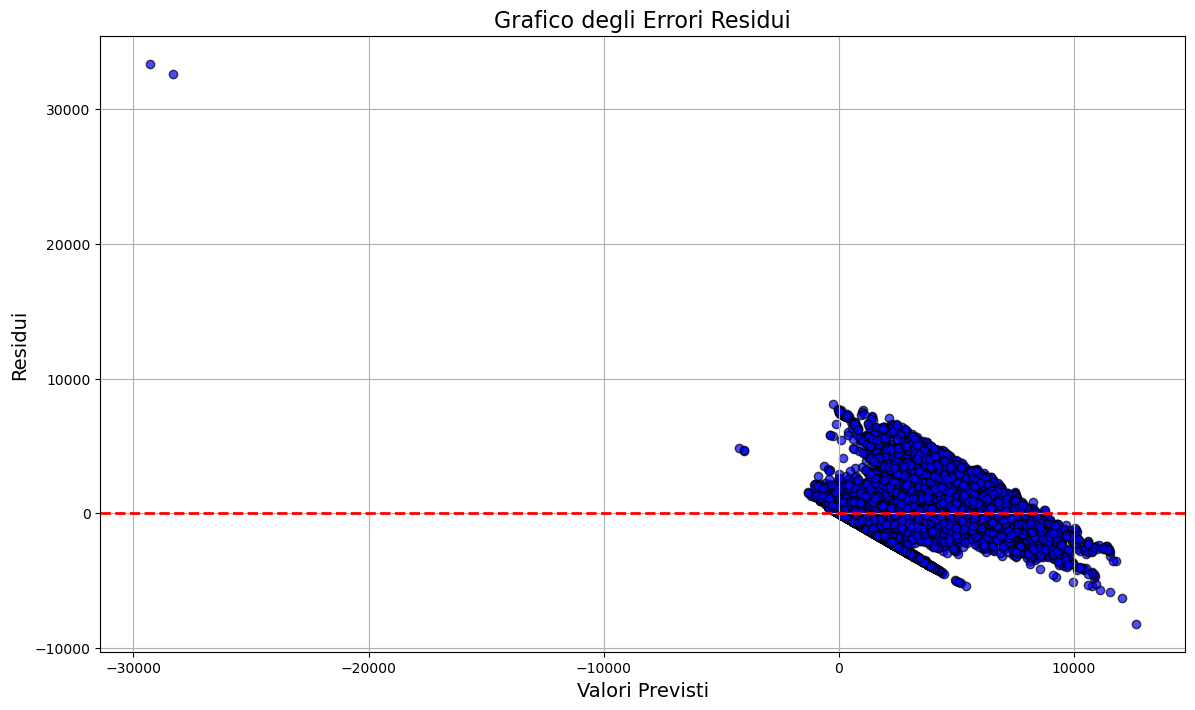

In [ ]:
residuals = y_test - y_pred_test
plt.figure(figsize=(14, 8))
plt.scatter(y_pred_test, residuals, color='blue', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Grafico degli Errori Residui', fontsize=16)
plt.xlabel('Valori Previsti', fontsize=14)
plt.ylabel('Residui', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#function to fit OLS model
def fit_linear_reg(X,Y):
    model_k = LinearRegression(fit_intercept=True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R2 = model_k.score(X,Y)
    return RSS,R2

In [ ]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook
import itertools 


In [ ]:
#initializing the variables:
x = df_encoded.drop(['daily_yield'], axis=1)
y = df_encoded['daily_yield']

k = 8 #number of predictors = 8

remaining_features = list(x.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf

    for combo in itertools.combinations(remaining_features,1):
        RSS = fit_linear_reg(x[list(combo) + features],y)

        if RSS[0] < best_RSS:
            best_RSS = RSS[0]
            best_R_squared = RSS[1] 
            best_feature = combo[0]
    
    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)

    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [ ]:
#Combining forward stepwise results into a new DataFrame
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [ ]:
#Initializing useful variables
m = len(y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))

In [ ]:
#finding the best model based on R_squared_adj
best_model = df1.loc[df1['BIC'] == df1['BIC'].min()]
best_model.features.value_counts()

[ambient_temperature, module_temperature, date_time, source_key_x_bvBOhCH3iADSZry, ac_power, dc_power, source_key_x_1BY6WEcLGh8j5v7]    1
Name: features, dtype: int64

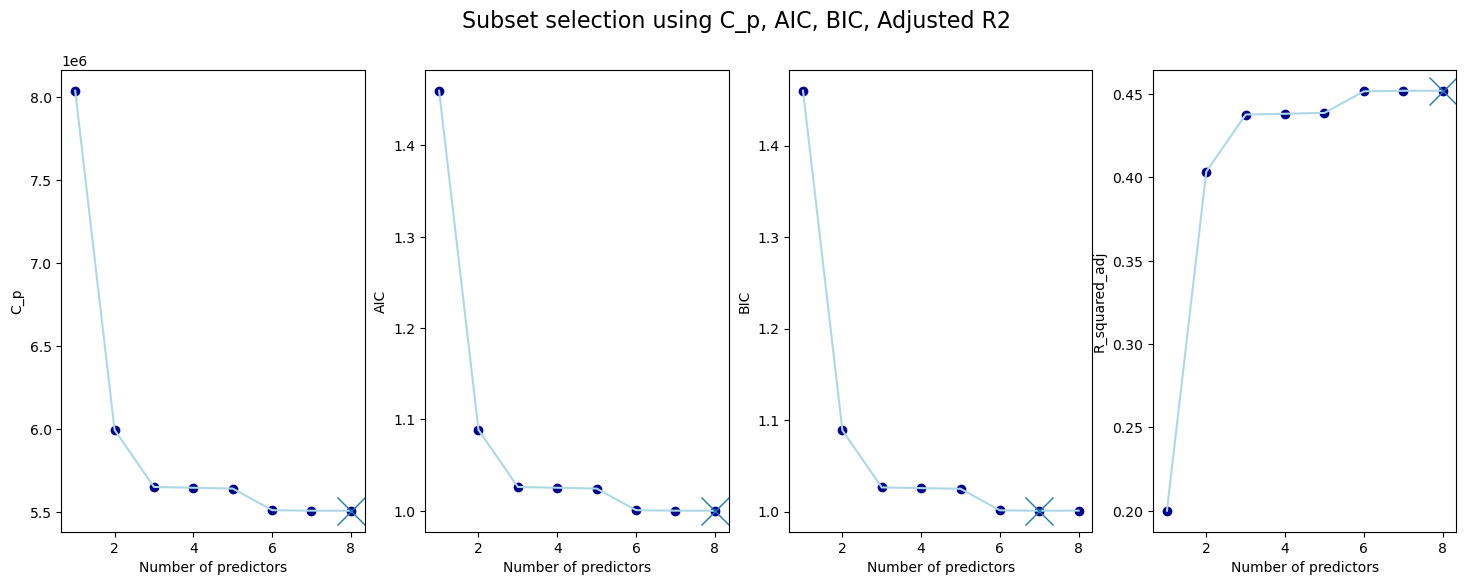

In [ ]:
#Plotting the computed values as a function of number of features
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [ ]:
#plotting the new model after SS
#create a linear regression for the whole plant 1
X = df_encoded[['ambient_temperature', 'module_temperature', 'date_time',  'ac_power', 'dc_power',]]
y = df_encoded['daily_yield']

# Dividere il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()

# Addestrare il modello
model.fit(X_train, y_train)

# Fare previsioni sul set di test
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Valutare il modello utilizzando la Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"\nMean Squared Error sul set di test: {mse_test}")

# Calcolare il R^2 per il set di test
r2_test = r2_score(y_test, y_pred_test)
print(f"R^2 sul set di test: {r2_test}")

# Calcolare il R^2 per il set di addestramento
r2_train = r2_score(y_train, y_pred_train)
print(f"R^2 sul set di addestramento: {r2_train}")

model.coef_



Mean Squared Error sul set di test: 5733632.952016999
R^2 sul set di test: 0.428717997734811
R^2 sul set di addestramento: 0.4558414427747417


array([ 1.19803284e+03, -1.99522906e+02,  7.63264953e-04, -4.26649991e+02,
        4.15740794e+02])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Inizializza le variabili
x = df_encoded.drop(['daily_yield'], axis=1)
y = df_encoded['daily_yield']

# Dividi i dati in set di addestramento e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inizializza il modello Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Addestra il modello sui dati di addestramento
rf.fit(x_train, y_train)

# Prevedi i valori sui dati di test
y_pred = rf.predict(x_test)

# Valuta il modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance sul test set:")
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

KeyboardInterrupt: 